## Sampling and distributions

In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
from scipy.stats.distributions import bernoulli
def throw_a_coin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

In [3]:
random_flips = throw_a_coin(10000)
running_means = np.zeros(10000)
sequence_lengths = np.arange(1,10001,1)
for i in sequence_lengths:
    running_means[i-1] = np.mean(random_flips[:i])

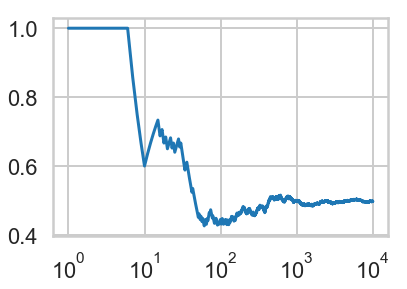

In [4]:
plt.plot(sequence_lengths, running_means);
plt.xscale('log')

In [5]:
def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.mean(start, axis=1)

In [6]:
make_throws(number_of_samples=20, sample_size=10)

array([0.2, 0.6, 0.6, 0.4, 0.6, 0.7, 0.3, 0.8, 0.1, 0.2, 0.3, 0.3, 0.5,
       0.4, 0.6, 0.3, 0.5, 0.4, 0.5, 0.4])

In [7]:
sample_sizes=np.arange(1,1001,1)
sample_means = [make_throws(number_of_samples=200, sample_size=i) for i in sample_sizes]

In [8]:
mean_of_sample_means = [np.mean(means) for means in sample_means]

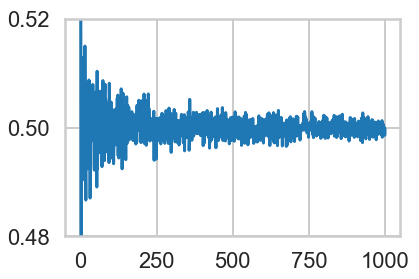

In [9]:
plt.plot(sample_sizes, mean_of_sample_means);
plt.ylim([0.480,0.520]);

In [10]:
sample_means_at_size_10=sample_means[9]
sample_means_at_size_100=sample_means[99]
sample_means_at_size_1000=sample_means[999]

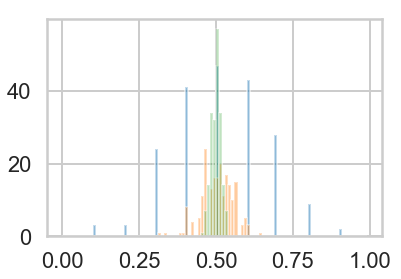

In [11]:
plt.hist(sample_means_at_size_10, bins=np.arange(0,1,0.01), alpha=0.5);
plt.hist(sample_means_at_size_100, bins=np.arange(0,1,0.01), alpha=0.4);
plt.hist(sample_means_at_size_1000, bins=np.arange(0,1,0.01), alpha=0.3);

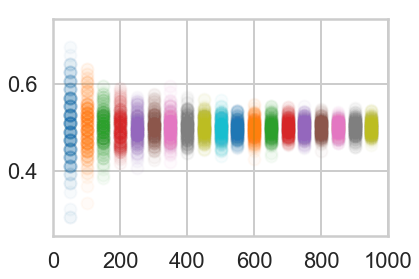

In [12]:
for i in sample_sizes:
    if i %50 ==0 and i < 1000:
        plt.scatter([i]*200, sample_means[i], alpha=0.03);
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);

In [13]:
std_of_sample_means_1000 = [np.std(means) for means in sample_means]

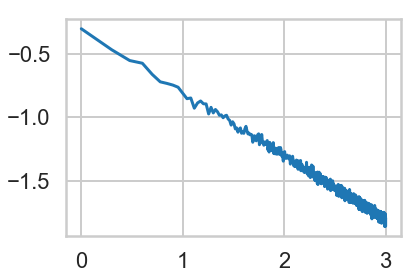

In [14]:
plt.plot(np.log10(sample_sizes), np.log10(std_of_sample_means_1000));

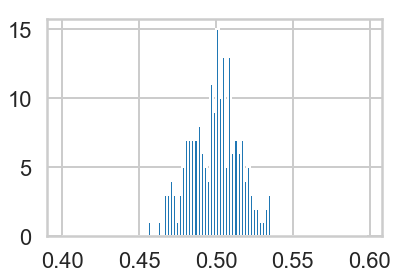

In [ ]:
plt.hist(sample_means_at_size_1000, bins=np.arange(0.4,0.6,0.002));

In [ ]:
def make_throws_var(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.var(start, axis=1)
sample_vars_1000_replicates = [make_throws_var(number_of_samples=1000, sample_size=i) for i in sample_sizes]
mean_of_sample_vars_1000 = [np.mean(vars) for vars in sample_vars_1000_replicates]
plt.plot(sample_sizes, mean_of_sample_vars_1000);
plt.xscale("log");

In [ ]:
plt.hist(sample_vars_1000_replicates[99], bins=np.arange(0.2,0.26,0.001), alpha=0.2, normed=True);

### An application: Gallup party affiliation poll

In [ ]:
gallup_2012=pd.read_csv("g12.csv").set_index('State')
gallup_2012["Unknown"] = 100 - gallup_2012.Democrat - gallup_2012.Republican
gallup_2012.head()

In [ ]:
gallup_2012["SE_percentage"]=100.0*np.sqrt((gallup_2012.Democrat/100.)*((100. - gallup_2012.Democrat)/100.)/(gallup_2012.N -1))
gallup_2012.head()

In [ ]:
from scipy.special import erf
def uncertain_gallup_model(gallup):
    sigma = 3
    prob =  .5 * (1 + erf(gallup.Dem_Adv / np.sqrt(2 * sigma**2)))
    return pd.DataFrame(dict(Obama=prob), index=gallup.index)

In [ ]:
predictwise = pd.read_csv("predictwise.csv")

In [ ]:
model = uncertain_gallup_model(gallup_2012)
model = model.join(predictwise.Votes)